In [144]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [145]:
import mysql.connector

In [146]:
from mysql.connector import Error

In [147]:
def connect(host_name, user_name, user_password):
    connection = None
    
    try:
        connection = mysql.connector.connect(host = host_name,
                                             user = user_name,
                                             password = user_password,
                                             database = "projdb")
        print("connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

In [148]:
conn = connect("localhost","dmaproject", "C0keZ3r@")

connection successful


In [149]:
cursorObject = conn.cursor()
print("Display all records from the Players table")
query = "Select PlayerID, Age from Players"
cursorObject.execute(query)
myresult = cursorObject.fetchall()

for x in myresult:
    print(x)

Display all records from the Players table
(1, 18)
(2, 16)
(3, 31)
(4, 25)
(5, 31)
(6, 36)
(7, 26)
(8, 24)
(9, 26)
(10, 28)
(11, 23)
(12, 29)
(13, 35)
(14, 30)
(15, 24)
(16, 25)
(17, 35)
(18, 30)
(19, 26)
(20, 22)
(21, 30)
(22, 19)
(23, 33)
(24, 24)
(25, 21)
(26, 18)
(27, 35)
(28, 33)
(29, 26)
(30, 26)
(31, 26)
(32, 23)
(33, 20)
(34, 32)
(35, 35)
(36, 23)
(37, 17)
(38, 16)
(39, 33)
(40, 13)
(41, 30)
(42, 16)
(43, 23)
(44, 26)
(45, 27)
(46, 18)
(47, 26)
(48, 33)
(49, 23)
(50, 30)


In [150]:
cursorObject = conn.cursor()
query ="select Position, count(Position) as Number from Player_Position group by Position having count(Position) >= 7"
cursorObject.execute(query)
myresult = cursorObject.fetchall()

for x in myresult:
    print(x)


('Midfielder', 10)
('Forward', 8)
('Defender', 13)


In [151]:
cursorObject = conn.cursor()
query="select  r.Amount, r.SName, s.BOID from Sponsors as r left outer join Managed_By as s on (r.Period=s.Period)"
cursorObject.execute(query)
myresult = cursorObject.fetchall()

for x in myresult:
    print(x)


(282657, 'Adidas', 106)
(282657, 'Adidas', 109)
(282657, 'Adidas', 110)
(292536, 'Nike', 101)
(292536, 'Nike', 102)
(292536, 'Nike', 104)
(292536, 'Nike', 106)
(292536, 'Nike', 108)
(511776, 'Adidas', 103)
(511776, 'Adidas', 108)
(511776, 'Adidas', 109)
(1650907, 'UnderArmor', 101)
(1650907, 'UnderArmor', 102)
(1650907, 'UnderArmor', 105)
(1650907, 'UnderArmor', 108)
(1650907, 'UnderArmor', 109)
(1234541, 'Puma', 102)
(1206075, 'Nike', 103)
(1206075, 'Nike', 108)
(1206075, 'Nike', 110)


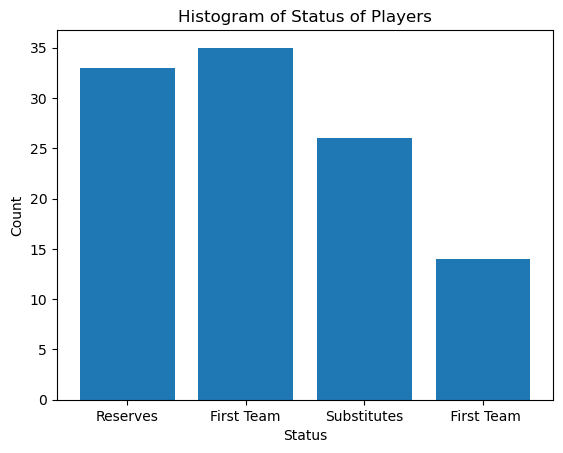

In [152]:
import matplotlib.pyplot as plt

cursorObject = conn.cursor()
cursorObject.execute("""
SELECT Status,
       PlayerID
FROM Active;
""")
myresult = cursorObject.fetchall()

# Creating a dictionary to store the data
data = {}
for i in myresult:
    data[i[0]] = i[1]
# Creating the histogram
fig, ax = plt.subplots()
ax.bar(data.keys(), data.values())

# Customize the plot
ax.set_xlabel("Status")
ax.set_ylabel("Count")
ax.set_title("Histogram of Status of Players")

# Show the plot
plt.show()

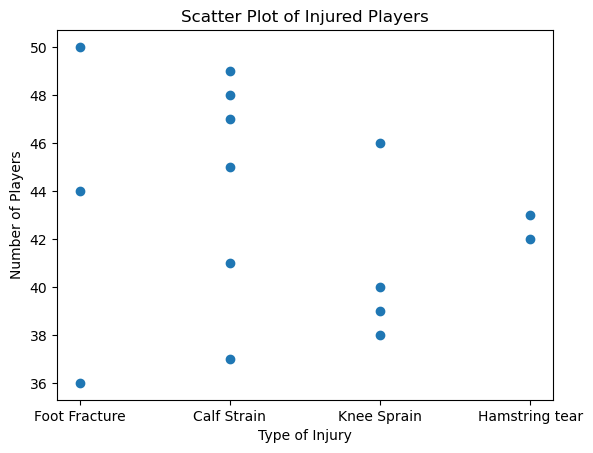

In [153]:
import matplotlib.pyplot as plt

cursorObject = conn.cursor()
cursorObject.execute("""
SELECT Type_of_injury, PlayerID
FROM Inactive;
""")
myresult = cursorObject.fetchall()

# Creating lists to store the data
id = []
injury = []
for i in myresult:
    id.append(i[0])
    injury.append(i[1])

# Creating the scatter plot
fig, ax = plt.subplots()
ax.scatter(id, injury)

# Customize the plot
ax.set_xlabel("Type of Injury")
ax.set_ylabel("Number of Players")
ax.set_title("Scatter Plot of Injured Players")

# Show the plot
plt.show()


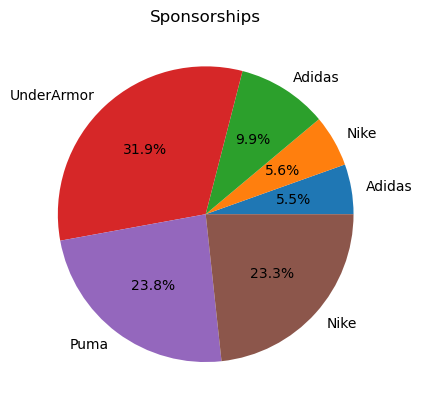

In [154]:
import matplotlib.pyplot as plt

cursorObject = conn.cursor()
cursorObject.execute("SELECT  SName, Amount FROM Sponsors")
rows = cursorObject.fetchall()

labels = [row[0] for row in rows]
values = [row[1] for row in rows]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sponsorships')
plt.show()
